### Simple Linear Regression

Linear regression is a linear approach to modeling the relationship between a dependent variable and one or more independent variables.

#### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Read our csv file
df = pd.read_csv("satislar.csv")

In [3]:
df.head()

,Aylar,Satislar
0,8,19671.5
1,10,23102.5
2,11,18865.5
3,13,21762.5
4,14,19945.5


In [4]:
df.isna().sum()

Aylar       0
Satislar    0
dtype: int64

#### spliting our data as test and train

In [5]:
aylar = df.iloc[:, 0:1].values
satislar = df.iloc[:, 1:].values

In [6]:
aylar

array([[ 8],
       [10],
       [11],
       [13],
       [14],
       [19],
       [19],
       [20],
       [20],
       [24],
       [25],
       [25],
       [25],
       [26],
       [29],
       [31],
       [32],
       [34],
       [37],
       [37],
       [42],
       [44],
       [49],
       [50],
       [54],
       [55],
       [59],
       [59],
       [64],
       [65]])

In [7]:
satislar

array([[19671.5],
       [23102.5],
       [18865.5],
       [21762.5],
       [19945.5],
       [28321. ],
       [30075. ],
       [27222.5],
       [32222.5],
       [28594.5],
       [31609. ],
       [27897. ],
       [28478.5],
       [28540.5],
       [30555.5],
       [33969. ],
       [33014.5],
       [41544. ],
       [40681.5],
       [ 4697. ],
       [45869. ],
       [49136.5],
       [50651. ],
       [56906. ],
       [54715.5],
       [52791. ],
       [58484.5],
       [56317.5],
       [61195.5],
       [60936. ]])

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x_train, x_test, y_train, y_test = train_test_split(aylar, satislar, test_size=0.33, random_state=0)

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
sc = StandardScaler()

In [12]:
X_train = sc.fit_transform(x_train)
X_test = sc.fit_transform(x_test)
Y_train = sc.fit_transform(y_train)
Y_test = sc.fit_transform(y_test)

In [13]:
X_train

array([[-0.70368853],
       [ 0.15126015],
       [-0.63792324],
       [-0.0460357 ],
       [ 1.33503524],
       [ 0.80891298],
       [-1.29557607],
       [ 2.32151449],
       [-0.70368853],
       [-1.03251494],
       [ 0.48008657],
       [ 0.48008657],
       [-0.37486211],
       [-0.63792324],
       [ 1.66386166],
       [-1.09828023],
       [-1.42710664],
       [ 0.94044355],
       [ 0.08549487],
       [-0.30909683]])

In [14]:
X_test

array([[-1.68268756],
       [ 1.33023274],
       [-0.82997427],
       [-0.88682182],
       [ 1.04599497],
       [ 0.76175721],
       [ 1.04599497],
       [-0.88682182],
       [-0.37519385],
       [ 0.47751944]])

In [15]:
#model building
from sklearn.linear_model import LinearRegression

In [16]:
lr = LinearRegression()

In [17]:
lr.fit(X_train, Y_train)
tahmin = lr.predict(X_test)

In [18]:
tahmin

array([[-1.33324088],
       [ 1.05398097],
       [-0.65761206],
       [-0.70265398],
       [ 0.82877136],
       [ 0.60356175],
       [ 0.82877136],
       [-0.70265398],
       [-0.29727668],
       [ 0.37835214]])

In [19]:
lr = LinearRegression()
lr.fit(x_train, y_train)
tahmin = lr.predict(x_test)

In [20]:
tahmin

array([[20126.21865404],
       [57740.29412655],
       [30771.7117123 ],
       [30062.01217508],
       [54191.79644047],
       [50643.29875438],
       [54191.79644047],
       [30062.01217508],
       [36449.30801003],
       [47094.80106829]])

In [21]:
y_test

array([[18865.5],
       [61195.5],
       [28540.5],
       [31609. ],
       [58484.5],
       [54715.5],
       [56317.5],
       [27897. ],
       [41544. ],
       [50651. ]])

Our chart will be conflex because our months column is not in a certain order.

My x and y train data is in array format. Let's first convert it to data frame, then let's sort the values by the '0' column. Finally, let's reset the mixed indexes and drop the index column.

In [65]:
a = pd.DataFrame(x_train).sort_values(by = [0])

In [66]:
a = a.reset_index()

In [67]:
a.drop('index', axis=1, inplace=True)

In [68]:
b = pd.DataFrame(y_train).sort_values(by = [0])
b = b.reset_index()

In [69]:
b.drop('index', axis=1, inplace=True)

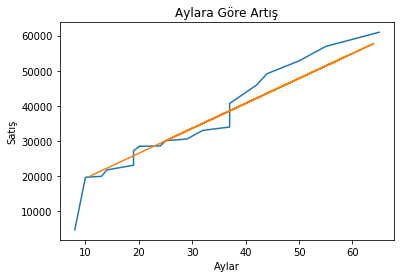

In [74]:
plt.plot(a, b)
plt.plot(x_test, lr.predict(x_test))
plt.xlabel("Aylar")
plt.ylabel("Satış")
plt.title("Aylara Göre Artış");